In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import optuna

from floOTflix.datasets import toydata_get_dataset
from floOTflix.utils import seed
from floOTflix.plots import plot_heatmap
from floOTflix.models import CLIDIOTModel

# Generate dataset

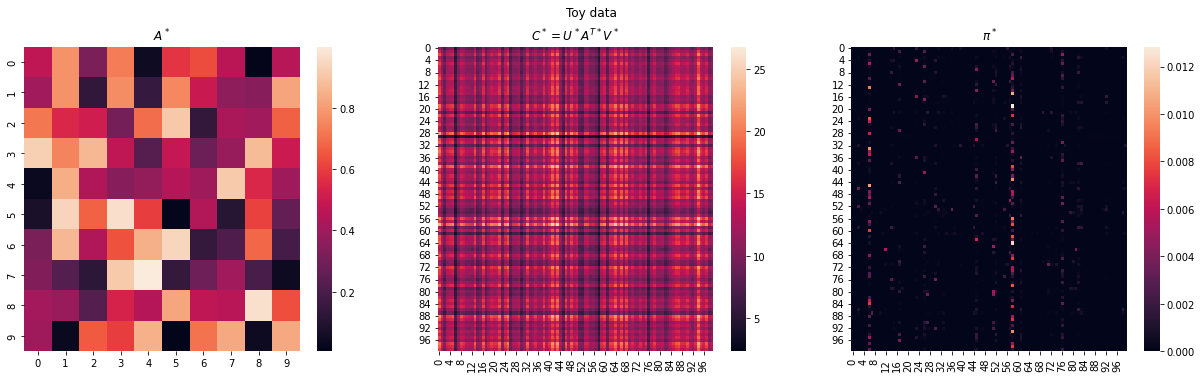

In [9]:
m, n = 100, 100
k = 10

seed(2)

(X_train, y_train), (X_test, y_test), (pi_train, pi_test, C_truth, U_truth, V_truth, A_truth) = toydata_get_dataset(m, n, k)

pi_sample = pi_train.nan_to_num() + pi_test.nan_to_num()
X = torch.cat([X_train, X_test], dim=0)
y = torch.cat([y_train, y_test], dim=0)

plot_heatmap(matrices=[A_truth, C_truth, pi_sample], titles=["$A^*$", "$C^* = U^*{A^T}^*V^*$", "$\pi^*$"], title="Toy data")

# Solve using CLIDIOT

Epoch 0, train error: 0.0005892761400900781, test error: 0.0005762320361100137
Epoch 10, train error: 0.0005870444001629949, test error: 0.0005689867539331317
Epoch 20, train error: 0.0005868488806299865, test error: 0.0005689457757398486
Epoch 30, train error: 0.0005867207073606551, test error: 0.0005690195830538869
Epoch 40, train error: 0.0005866565043106675, test error: 0.0005691274418495595
Epoch 50, train error: 0.0005866257124580443, test error: 0.0005692364647984505
Epoch 60, train error: 0.0005866123246960342, test error: 0.0005693385610356927
Epoch 70, train error: 0.0005866085994057357, test error: 0.0005694325664080679
Epoch 80, train error: 0.0005866106366738677, test error: 0.0005695190047845244
Epoch 90, train error: 0.0005866162246093154, test error: 0.0005695984000340104


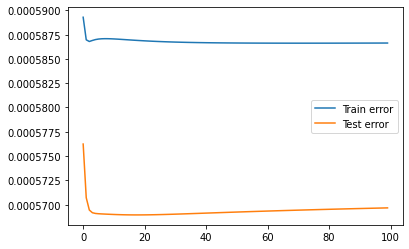

In [13]:
m, n, k = *pi_sample.shape, A_truth.shape[0]

def F(pi_ij):
    return pi_ij


model = CLIDIOTModel(m=m, n=n, F=F)

U = U_truth
V = V_truth
eps = .1
prox_gamma = 100
prox_lr = 1e-3

train_errors, test_errors = model.fit(X, y, X_test, y_test,
                                        U=U,
                                        V=V,
                                        eps=eps,
                                        max_clidiot_iter=100,
                                        #   max_prox_iter=max_prox_iter,
                                        prox_gamma=prox_gamma,
                                        prox_lr=prox_lr,
                                        #   eps_num_stability=eps_num_stability,
                                        verbose=True)

sns.lineplot(x=np.arange(len(train_errors)), y=train_errors, label="Train error")
sns.lineplot(x=np.arange(len(test_errors)), y=test_errors, label="Test error");

In [14]:
A_hat = model.A
C_hat = U @ A_hat @ V.t()
_, pi_hat = model.predict(X)

plot_heatmap(matrices=[A_truth, C_truth, pi_sample], titles=["$A^*$", "$C^* = U^*{A^T}^*V^*$", "$\pi^*$"], title="Toy data")
plot_heatmap(matrices=[A_hat, C_hat, pi_hat], titles=["$\hat{A}$", "$\hat{C} = U^* \hat{A}^T V^*$", "$\hat{\pi}$"], title="Toy data")

AttributeError: 'CLIDIOTModel' object has no attribute 'A'